In [2]:
from keras.utils import load_img, img_to_array
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

## Load the model

In [5]:

#download model
model = VGG16()

#load model from existing weights
#model=VGG16(weights="./vgg16_weights_tf_dim_ordering_tf_kernels.h5")

#### show model summary

In [6]:
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

#### visualize model

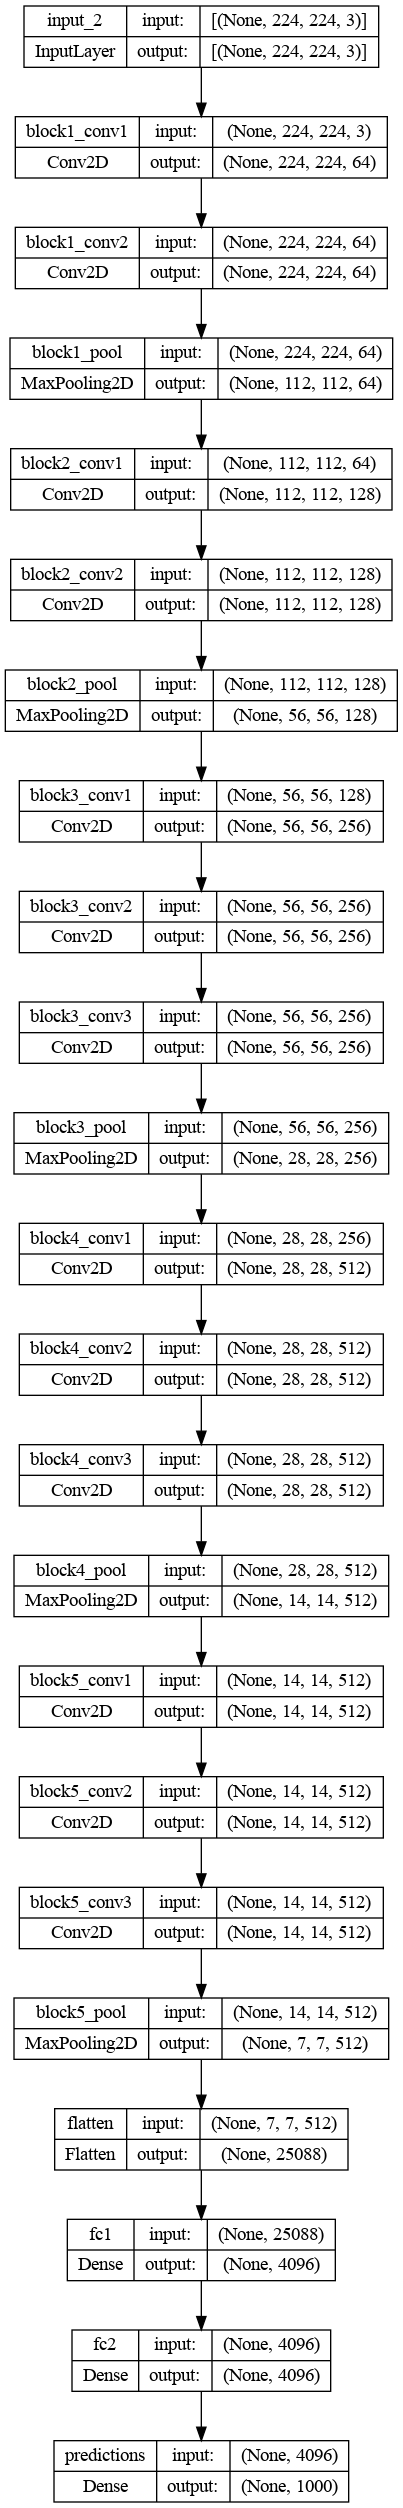

In [7]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Load and pre-process image

In [8]:
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)

## Predict

In [9]:
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat,top=5)

1/1 [==============================] - 0s 398ms/step


#### show all labels

In [10]:
label

[[('n03063599', 'coffee_mug', 0.7010682),
  ('n03063689', 'coffeepot', 0.10507006),
  ('n07930864', 'cup', 0.07677946),
  ('n04398044', 'teapot', 0.039143745),
  ('n03950228', 'pitcher', 0.030508274)]]

#### show predicted label

In [11]:
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

coffee_mug (70.11%)
